\newpage

In [17]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [38]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### **1. Classification Problem Identification**

Dataset is used from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

In this assignment, machine learning (ML) techniques have been deployed to predict, diagnose, and treat chronic kidney disease (CKD). 

In [145]:
## Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/336/data.csv'
df = pd.read_csv(data_url)
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd


In [113]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
# metadata 
print(chronic_kidney_disease.metadata) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [24]:
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [25]:
# Features
X.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no


In [26]:
# Target
y.head(2)

,class
0,ckd
1,ckd


The classification problem is determining whether a patient has early-stage CKD based on various medical measurements included in the dataset. There are two classes here: Early-stage Indian CKD patients and Healthy patients.

### **2. Variable Transformation**

In [27]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

From the dictionary， `sg`, `al`, `su` are Categorical variables. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc` are Integer variable. `rbc`, `pc`, `pcc`, `ba`, `htn`, `dm`, `cad`, `appet`, `pe`, `ane`, `class` are Binary variables. `sc`,`pot`,`hemo`,and `rbcc` are continuous varibles. Then, we need to transform `sg`, `al`, `su` into Cateforical variables.

In [146]:
columns_to_convert = ['sg', 'al', 'su']

for col in columns_to_convert:
    df[col] = pd.Categorical(df[col])

In [147]:
for col in columns_to_convert:
    print(df[col].value_counts(normalize=True))

sg
1.02     0.300283
1.01     0.237960
1.025    0.229462
1.015    0.212465
1.005    0.019830
Name: proportion, dtype: float64
al
0.0    0.562147
1.0    0.124294
2.0    0.121469
3.0    0.121469
4.0    0.067797
5.0    0.002825
Name: proportion, dtype: float64
su
0.0    0.826211
2.0    0.051282
3.0    0.039886
1.0    0.037037
4.0    0.037037
5.0    0.008547
Name: proportion, dtype: float64


In general, we do not need to convert binary variables. Since the classification algorithm is sensitive to the scale of the data, we choose to standardize those data under integer and continuous variable.

### **3. Dataset Overview**

In [124]:
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.00,354.0,351.0,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,5.00,6.0,6.0,2,2,2,2,NaN,...,NaN,NaN,NaN,2,3,2,2,2,2,3
top,NaN,NaN,1.02,0.0,0.0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,106.00,199.0,290.0,201,259,354,374,NaN,...,NaN,NaN,NaN,251,260,364,317,323,339,248
mean,51.483376,76.469072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Observations count
print(df.shape)
# type check
df.dtypes

(400, 25)


age       float64
bp        float64
sg       category
al       category
su       category
rbc        object
pc         object
pcc        object
ba         object
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn        object
dm         object
cad        object
appet      object
pe         object
ane        object
class      object
dtype: object

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sc'}>,
        <Axes: title={'center': 'sod'}>],
       [<Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'hemo'}>,
        <Axes: title={'center': 'pcv'}>],
       [<Axes: title={'center': 'wbcc'}>,
        <Axes: title={'center': 'rbcc'}>, <Axes: >]], dtype=object)

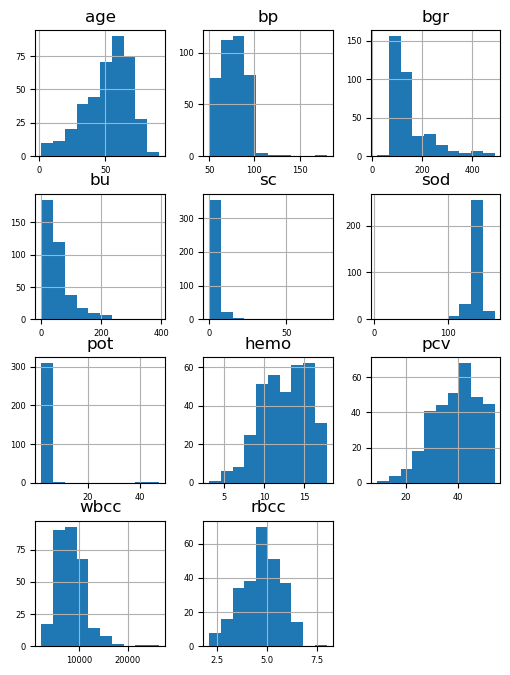

In [32]:
## Check the distribution of each variable
df.hist(xlabelsize=6,ylabelsize=6,figsize=(6,8))

There are 400 observations and 25 variables in the dataset. After the transformation in Part 2. `sg`, `al`, `su` are Categorical variables now. `age`, `bp`, `bgr`, `bu`, `sod`, `pcv`, `wbcc`,`sc`,`pot`,`hemo`,and `rbcc` variables are all of type float. The rest of the variables are object(in this case Binary).

According to the data summary, the mean of observations under the `age` variable was about 51.48. The maximum and minimum age are 90 and 2 respectively, respectively. Also, the mean of `bp` (blood pressure) is about 76.47. But there may be some missing values and outliers in the dataset based on the data summary.

Also, we can find that most of them have the skewness problem by looking at the distribution of observations under each variable. So, this implies that there exist a lot of missing values and outliers in our dataset.

### **4. Association Between Variables**

Create a heatmap to find potential relationship between variables.

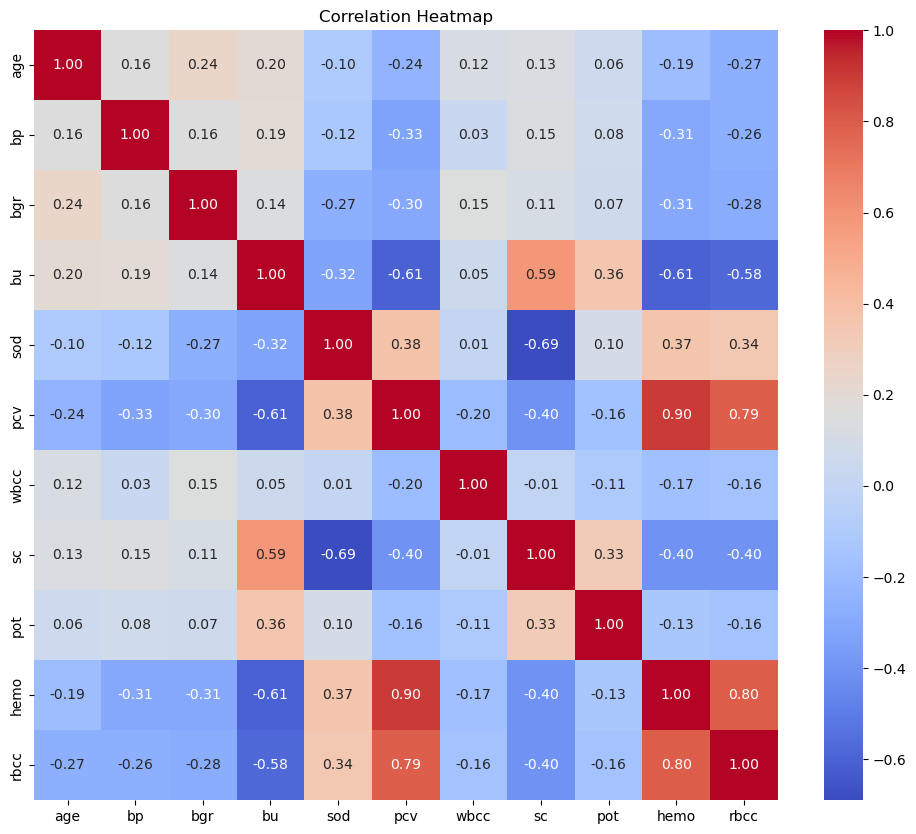

In [33]:
num_col = ['age','bp','bgr','bu','sod','pcv','wbcc','sc','pot','hemo','rbcc']

# Compute the correlation matrix
correlation_matrix = df[num_col].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, it indicates that ...

### **5. Missing Value Analysis and Handling**

In [125]:
df.shape

(400, 25)

In [126]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [116]:
print(df.shape)
df_dropna = df.dropna()
print(df_dropna.shape)


(400, 25)
(158, 25)


shape is not good, so we cannot just drop missing value, we replace them with median

In [138]:
df[num_col].median()

age       55.00
bp        80.00
bgr      121.00
bu        42.00
sod      138.00
pcv       40.00
wbcc    8000.00
sc         1.30
pot        4.40
hemo      12.65
rbcc       4.80
dtype: float64

In [134]:
# Replace missing values with median


### **6. Outlier Analysis**

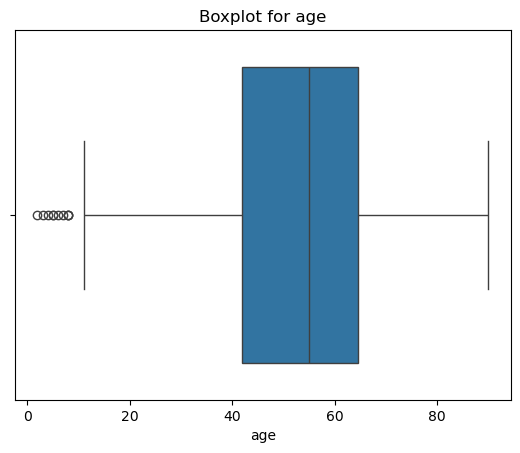

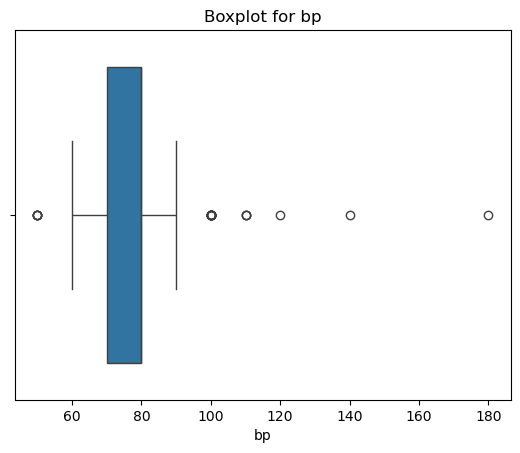

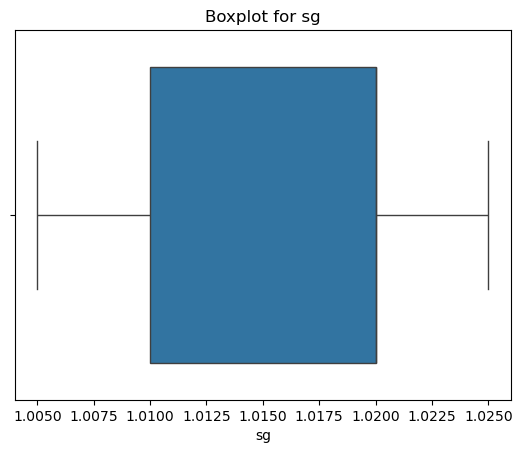

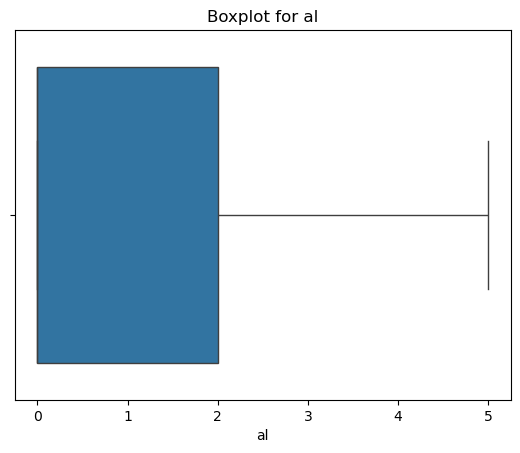

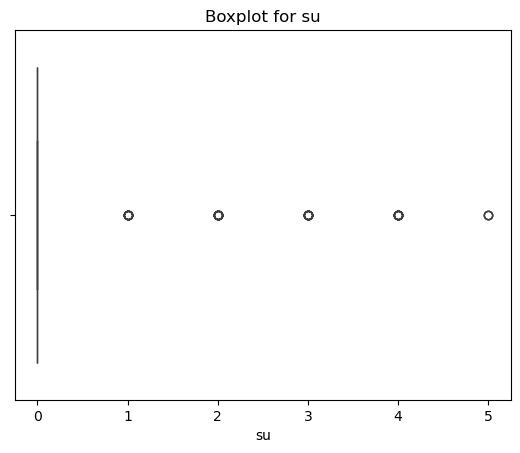

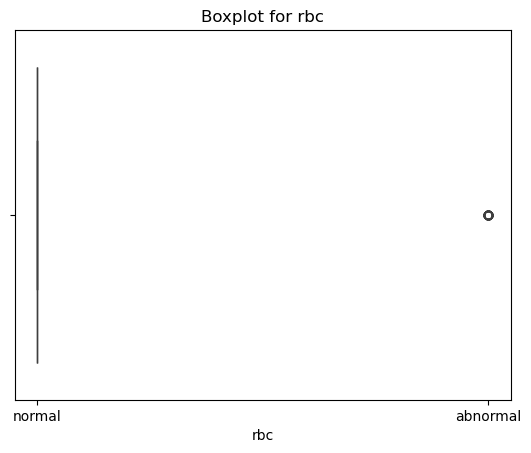

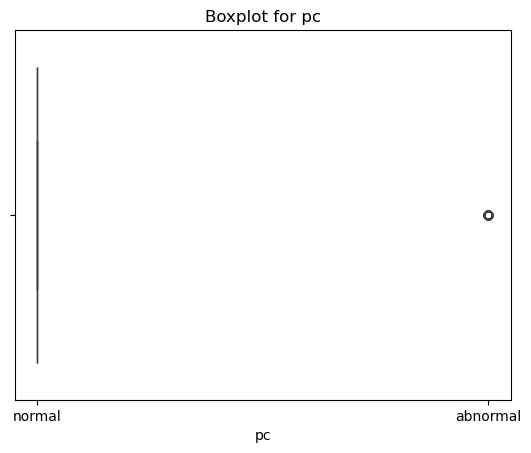

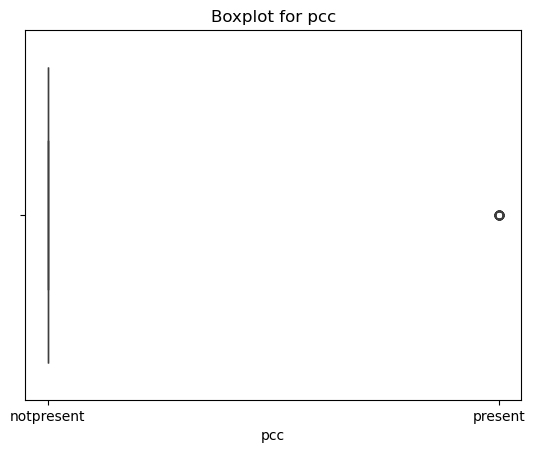

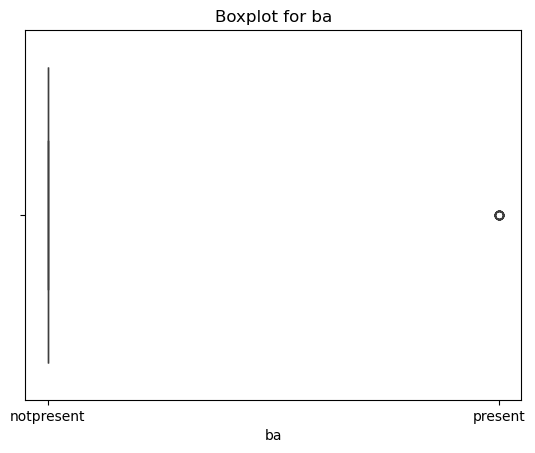

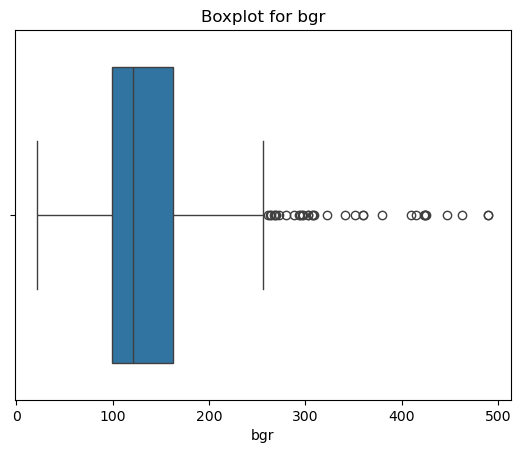

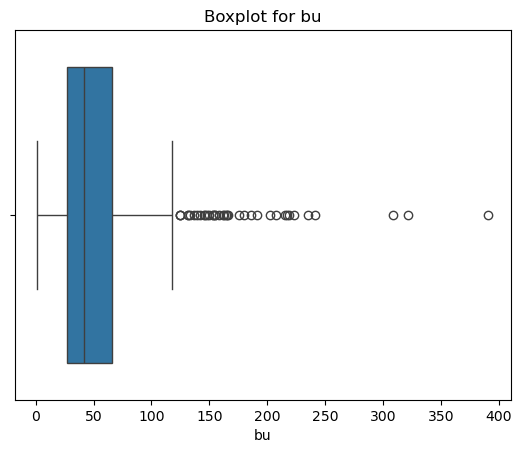

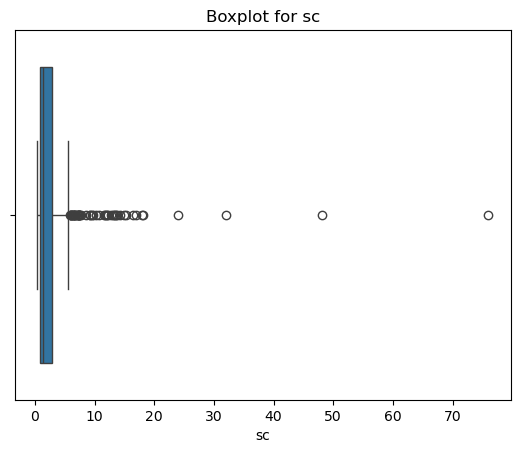

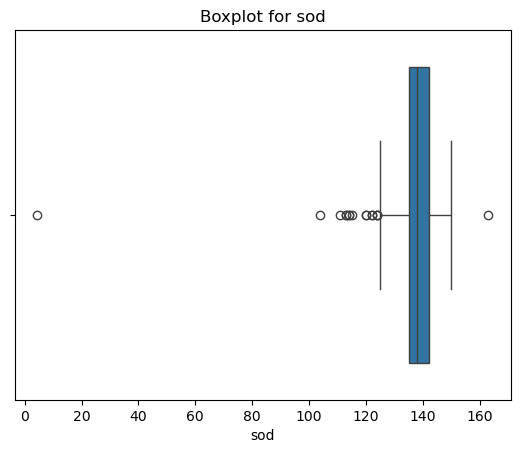

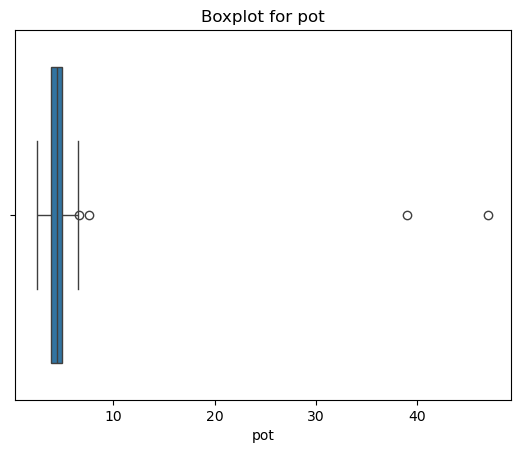

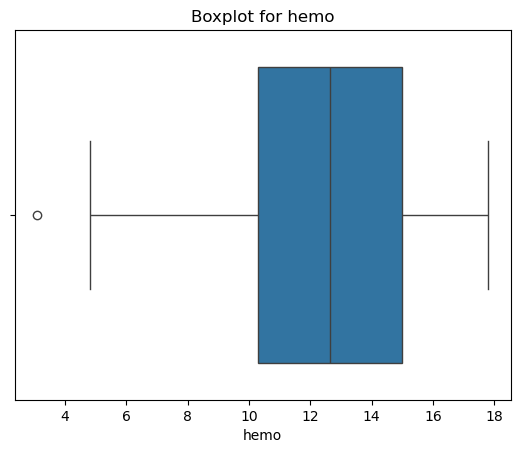

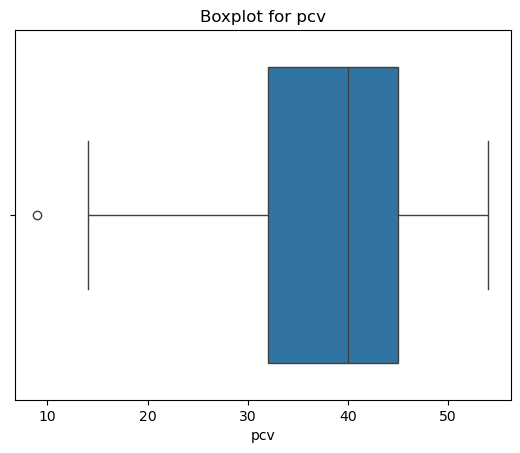

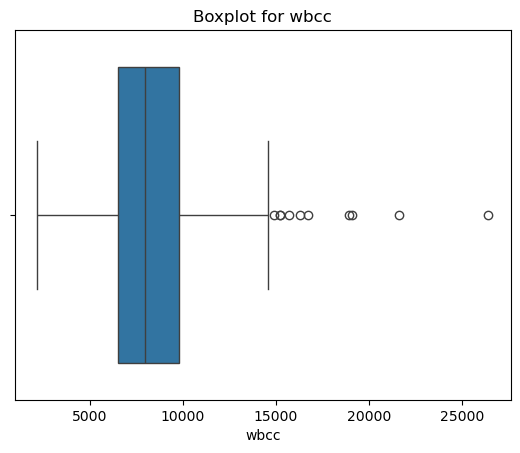

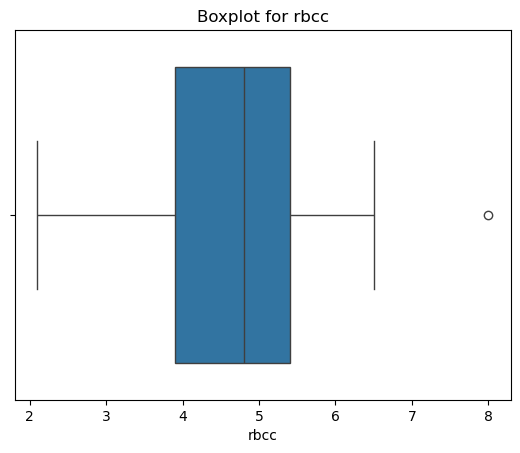

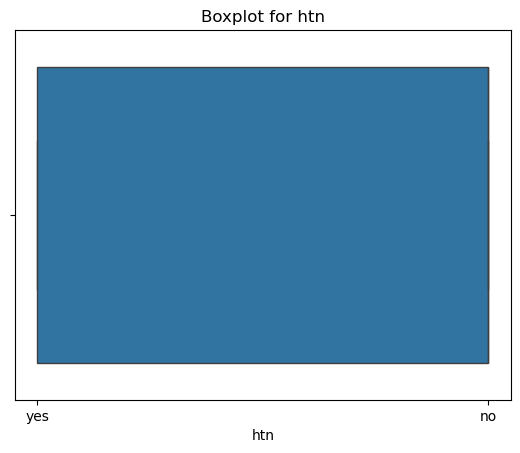

/Users/lingyunhuang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


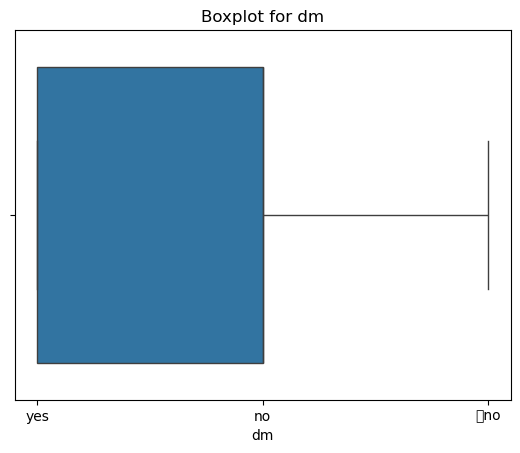

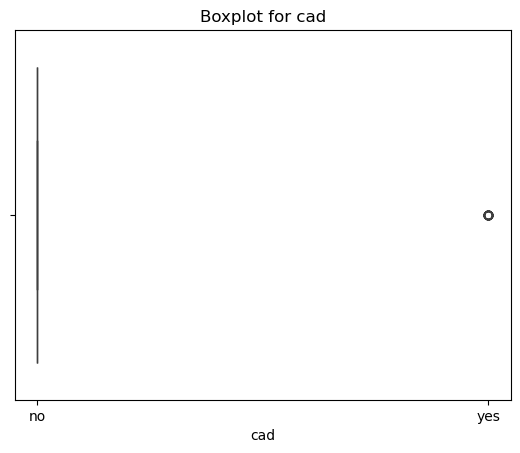

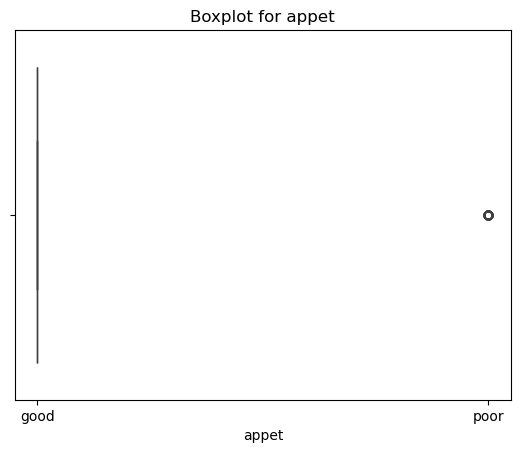

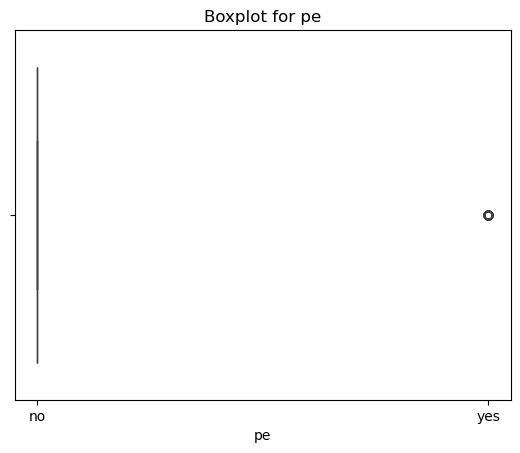

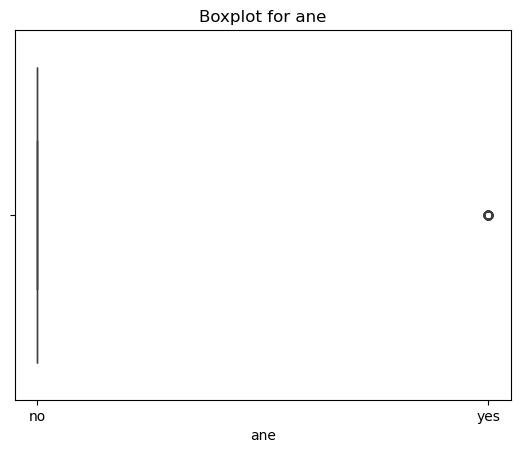

/Users/lingyunhuang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


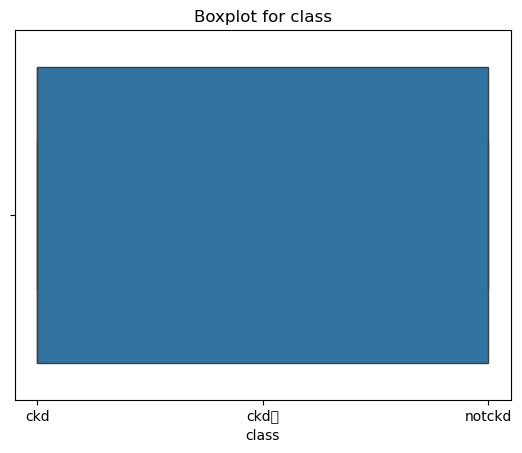

In [149]:
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

### **7. Sub-group Analysis**

### **8. Data Splitting**

### **9. Classifier Choices**

### **10. Performance Metrics**

### **11. Feature Selection/Extraction**

### **12. Classifier Comparison**

### **13. Interpretable Classifier Insight**

### **14. [Bonus] Sub-group Improvement Strategy**

### **15. Team Contributions**

### **16. Link to the public GitHub repository**

https://github.com/Barkesty/Project-Chronic-Kidney-Disease-Classification-Challenge.git